# Flow, Paths and Limit Cycles

This Jupyter notebook explores fundamental concepts in dynamical systems theory, focusing on flows, trajectories, and limit cycles in two-dimensional systems. We'll analyze phase portraits, stability of equilibrium points, and periodic orbits through both analytical and numerical methods.

**Topics covered:**
- Flow and trajectory definitions
- Equilibrium points and linear stability analysis
- Limit sets and invariant sets
- Basins of attraction
- Limit cycles and their stability
- Poincaré-Bendixson theorem
- Dulac's and Bendixson's criteria for existence/non-existence of closed orbits

**Examples studied:**
- A cubic nonlinear system with multiple equilibria
- Holling-Tanner predator-prey model
- The nonlinear pendulum
- Various systems demonstrating limit cycle behavior

We'll use phase plane analysis, streamplots, nullclines, eigenvalue/eigenvector analysis, and numerical integration to visualize and understand the dynamics of these systems.

First read some libraries needed.


In [6]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

### Routine to create the phase diagram
last time we made some function to create phase diagram. We will use them here as well.

In [5]:


def plot_flow(ax,rhs,xrange=[-2,2],yrange=[-2,2],xnum=100,ynum=100,params=None,nullclines=False): # A function that makes a stream plot of the vector field defined by rhs
    """
    Plots the vector field (flow) of a 2D dynamical system defined by the right-hand side function `rhs`.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes object to plot on.
    rhs : function
        The right-hand side function of the ODE system. Should accept arguments (t, pos, params).
    xrange : list or tuple, optional
        The range of x values as [xmin, xmax]. Default is [-2, 2].
    yrange : list or tuple, optional
        The range of y values as [ymin, ymax]. Default is [-2, 2].
    xnum : int, optional
        Number of grid points in the x direction. Default is 100.
    ynum : int, optional
        Number of grid points in the y direction. Default is 100.
    params : list or array-like, optional
        Parameters to pass to the rhs function. Default is None.
    nullclines : bool, optional
        If True, plot the nullclines (where dx/dt=0 in red and dy/dt=0 in blue). Default is False.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the vector field (and optionally nullclines) plotted.
    """

    u = np.linspace(xrange[0], xrange[1], xnum) # x values
    v = np.linspace(yrange[0], yrange[1], ynum) # y values
    uu, vv = np.meshgrid(u, v) # Create a meshgrid for the vector field

# Compute derivatives
    u_vel = np.empty_like(uu) # Initialize array for x derivatives
    v_vel = np.empty_like(vv)   # Initialize array for y derivatives
    for i in range(uu.shape[0]): # Loop over the grid points
        for j in range(uu.shape[1]):    # Nested loop for y direction
            u_vel[i,j], v_vel[i,j] = rhs(t=0,xy=np.array([uu[i,j], vv[i,j]]),params=params) # Evaluate rhs at each grid point

# Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2) # Calculate speed at each grid point

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max() # Line width scaling based on speed

# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw,color='grey') # Create the stream plot
#Nullclines
    if nullclines:  # If nullclines are requested
        ax.contour(uu, vv, u_vel, [0],colors=('r')) # Plot nullcline for u_vel=0
        ax.contour(uu, vv, v_vel, [0],colors=('b')) # Plot nullcline for v_vel=0

    return ax # Return the axis with the stream plot

# A function that plots a path
def plot_solution(ax,rhs,y0,t_end,t_dim=2000,params=None,color='green',init_pt=True,linewidth=2.5, linestyle='-'):
    """
    Integrates and plots the solution trajectory of a 2D ODE system.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes object to plot on.
    rhs : function
        The right-hand side function of the ODE system. Should accept arguments (t, pos, params).
    y0 : array-like
        Initial condition for the system [x0, y0].
    t_end : float
        End time for integration.
    t_dim : int, optional
        Number of time points for evaluation. Default is 2000.
    params : list or array-like, optional
        Parameters to pass to the rhs function. Default is None.
    color : str, optional
        Color of the trajectory. Default is 'green'.
    init_pt : bool, optional
        If True, marks the initial point on the plot. Default is True.
    linewidth : float, optional
        Width of the trajectory line. Default is 2.5.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the solution trajectory plotted.
    """
    t = np.linspace(0, t_end, t_dim)
    X = sc.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t,args=(params,))
    x,y=X.y
    t=X.t
    ax.plot(x,y, color=color,linewidth=linewidth, linestyle=linestyle)
    if (init_pt):
        ax=plot_point(ax,y0,color=color)
    return ax

#A function to add fixed points to a phase diagram
def plot_point(ax, coord, color='black',markersize=20):
    """
    Plots a point (typically a fixed point or initial condition) on the given axes.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes object to plot on.
    coord : array-like
        Coordinates of the point as [x, y].
    color : str, optional
        Color of the marker face. Default is 'black'.
    markersize : int, optional
        Size of the marker. Default is 20.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the point plotted.
    """
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax



# A nonlinear example
We will use
$$
\begin{array}{rl}
 \dot{x}(t) = & y \\[0.5pt]
 \dot{y}(t) = & x(1-x^2)-y
\end{array}
$$
as an example.

### Linear analysis (analytical)
Isocline: $\dot{x}$ is zero when $y=0$.

Isocline:  $\dot{y}$ is zero when $y=x(1-x^2)=x(1-x)(1+x)$.  

Hence, equilibrium points at $(x,y)=(0,0)$ (saddle point), $(x,y)=(1,0)$ and $(x,y)=(-1,0)$ (both stable spirals).

<span style="color:red"> Check this! </span>

Let's plot the flow and the isoclines, see that the isoclines cross each other at the right places.





In [4]:
def rhs(t,xy,params=None):
    x,y=xy
    dx=y
    dy=x*(1-x**2)-y
    return [dx,dy]

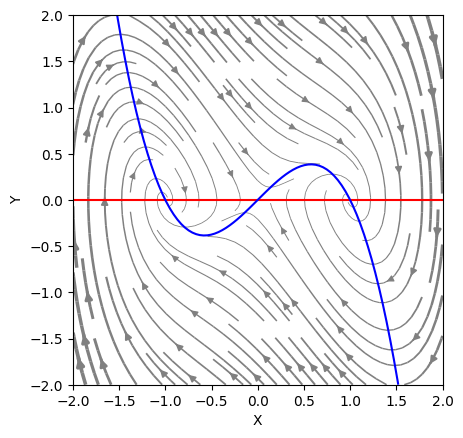

In [7]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=True)



## Numerical linear analysis
From the previous figure, it looks like we have fixed points at (-1,0), (0,0) and (1,0). We have found this already. Can we do the analysis through numerics?

Defining some functions.

In [8]:
def jacobian(rhs, xy, eps=1e-8):
    """
    Compute the Jacobian matrix of a system of differential equations at a given point.
    Parameters:
    rhs (function): The right-hand side function of the differential equations. It should take two arguments: time (t) and state (xy).
    xy (array-like): The point (x, y) at which to evaluate the Jacobian.
    eps (float, optional): A small perturbation value for numerical differentiation. Default is 1e-8.
    Returns:
    numpy.ndarray: A 2x2 Jacobian matrix evaluated at the point (x, y).
    Note:
    This function uses finite differences to approximate the partial derivatives.

    WARNING: The code and comment are from Gemini, use at own risk.
    """


    f0 = np.array(rhs(0, xy))
    jac = np.zeros((2, 2))

    for i in range(2):
        dxy = np.zeros(2)
        dxy[i] = eps
        f1 = np.array(rhs(0, xy + dxy))
        jac[:, i] = (f1 - f0) / eps

    return jac

def eigenvalues_eigenvectors(jac):
    """
    Calculate the eigenvalues and eigenvectors of a given Jacobian matrix.
    Parameters:
    jac (numpy.ndarray): A square matrix representing the Jacobian matrix.
    Returns:
    tuple: A tuple containing two elements:
        - eigenvalues (numpy.ndarray): An array of eigenvalues.
        - eigenvectors (numpy.ndarray): An array of eigenvectors, where each column is an eigenvector corresponding to the eigenvalue at the same index.


    WARNING: The code and comment are from Gemini, use at own risk.
    """

    eigenvalues, eigenvectors = np.linalg.eig(jac)
    return eigenvalues, eigenvectors


# Example usage
xy = [1, 0]
jac = jacobian(rhs, xy)
print(jac)

# Example usage
eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)

print("J:")
pprint(jac)
print()
print("Eigenvalues and Eigenvectors:")
for i in range(len(eigenvalues)):
    pprint(f"Eigenvalue {i+1}: {eigenvalues[i]}")
    pprint(f"Eigenvector {i+1}: {eigenvectors[:, i]}")
    print()


[[ 0.          1.        ]
 [-2.00000001 -1.        ]]
J:
array([[ 0.        ,  1.        ],
       [-2.00000001, -1.        ]])

Eigenvalues and Eigenvectors:
'Eigenvalue 1: (-0.5+1.3228756584974484j)'
'Eigenvector 1: [-0.20412414-0.54006172j  0.81649658+0.j        ]'

'Eigenvalue 2: (-0.5-1.3228756584974484j)'
'Eigenvector 2: [-0.20412414+0.54006172j  0.81649658-0.j        ]'



<span style="color:cadetblue">
Experiment with different epsilon in the call to the Jacobian above. What do you notice?
</span>



### Equilibrium points and linear stability.
Let's find the equilibrium points and do linear stability analysis numerically.


In [9]:
from scipy.optimize import fsolve

# Define the system of equations for equilibrium points. A needed wrapper.
def equilibrium_points(xy):
    return rhs(0, xy)

# Initial guesses for the equilibrium points
initial_guesses = [[0, 0], [1, 0], [-1, 0]]

# Find the equilibrium points
equilibrium_points = [fsolve(equilibrium_points, guess) for guess in initial_guesses]

# Print the equilibrium points
for point in equilibrium_points:
    print(f"Equilibrium point: {point}")

Equilibrium point: [0. 0.]
Equilibrium point: [1. 0.]
Equilibrium point: [-1.  0.]


<span style="color:cadetblue">
What happens if the initial guesses are off?
</span>

### Linear analysis,

In [10]:
for point in equilibrium_points:
    """
    Iterates through a list of equilibrium points, computes the Jacobian matrix at each point,
    and then calculates and prints the eigenvalues and eigenvectors of the Jacobian matrix.
    For each equilibrium point:
    - Computes the Jacobian matrix using the provided `rhs` function.
    - Calculates the eigenvalues and eigenvectors of the Jacobian matrix.
    - Prints the equilibrium point, the Jacobian matrix, and the eigenvalues.
    - If all eigenvalues are real, prints the eigenvectors.
    Args:
        equilibrium_points (list): A list of equilibrium points to analyze.
        rhs (function): The right-hand side function of the differential equations.
        jacobian (function): A function that computes the Jacobian matrix of `rhs` at a given point.
        eigenvalues_eigenvectors (function): A function that computes the eigenvalues and eigenvectors of a matrix.
    Returns:
        None
    """

    jac = jacobian(rhs, point)
    eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)

    print(f"Equilibrium point: {point}")
    print("Jacobian matrix:")
    pprint(jac)
    print("Eigenvalues:")
    pprint(eigenvalues)

    if np.all(np.isreal(eigenvalues)): # Check if eigenvalues are real, if so print the eigenvectors
        print("Eigenvectors:")
        pprint(eigenvectors)
    print()
    print()

Equilibrium point: [0. 0.]
Jacobian matrix:
array([[ 0.,  1.],
       [ 1., -1.]])
Eigenvalues:
array([ 0.61803399, -1.61803399])
Eigenvectors:
array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])


Equilibrium point: [1. 0.]
Jacobian matrix:
array([[ 0.        ,  1.        ],
       [-2.00000001, -1.        ]])
Eigenvalues:
array([-0.5+1.32287566j, -0.5-1.32287566j])


Equilibrium point: [-1.  0.]
Jacobian matrix:
array([[ 0.        ,  1.        ],
       [-1.99999998, -1.        ]])
Eigenvalues:
array([-0.5+1.32287565j, -0.5-1.32287565j])




### Plotting

In [11]:
# Plot the eigenvectors in the phase diagram for the ones with real eigenvalues

def plot_eigenvectors_phase_diagram(ax, rhs, equilibrium_points, colors=['blue', 'green'], legend=True, zoom_range=2):
    """
    Plots the phase diagram with eigenvectors for a given dynamical system.
    Parameters:
    ax (matplotlib.axes.Axes): The matplotlib axes object where the plot will be drawn.
    rhs (function): The right-hand side function of the dynamical system.
    equilibrium_points (list of arrays): List of equilibrium points of the system.
    colors (list of str, optional): List of colors for the eigenvectors. Defaults to ['blue', 'green'].
    legend (bool, optional): Whether to display the legend. Defaults to True.
    zoom_range (float, optional): The range for the x and y axes. Defaults to 2.
    Returns:
    matplotlib.axes.Axes: The matplotlib axes object with the plot.
    """

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')

    # Plot the flow
    ax = plot_flow(ax, rhs, nullclines=False, xrange=[-zoom_range, zoom_range], yrange=[-zoom_range, zoom_range])

    # Plot the eigenvectors for the equilibrium points with real eigenvalues
    for point in equilibrium_points:
        jac = jacobian(rhs, point)
        eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)

        if np.all(np.isreal(eigenvalues)):
            for i in range(len(eigenvalues)):
                eigenvector = eigenvectors[:, i]
                start_point = point
                end_point = point + eigenvector

                ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], label=f'Eigenvector {i+1}', linewidth=2.5, color=colors[i % len(colors)])
                ax.plot([start_point[0], -end_point[0]], [start_point[1], -end_point[1]], linewidth=2.5, color=colors[i % len(colors)])

    if legend:
        ax.legend(loc='upper right')
    # Plot the equilibrium points
    for point in equilibrium_points:
        ax = plot_point(ax, point, color='red')
    ax.set_xlim(-zoom_range,zoom_range)
    ax.set_ylim(-zoom_range,zoom_range)
    return ax


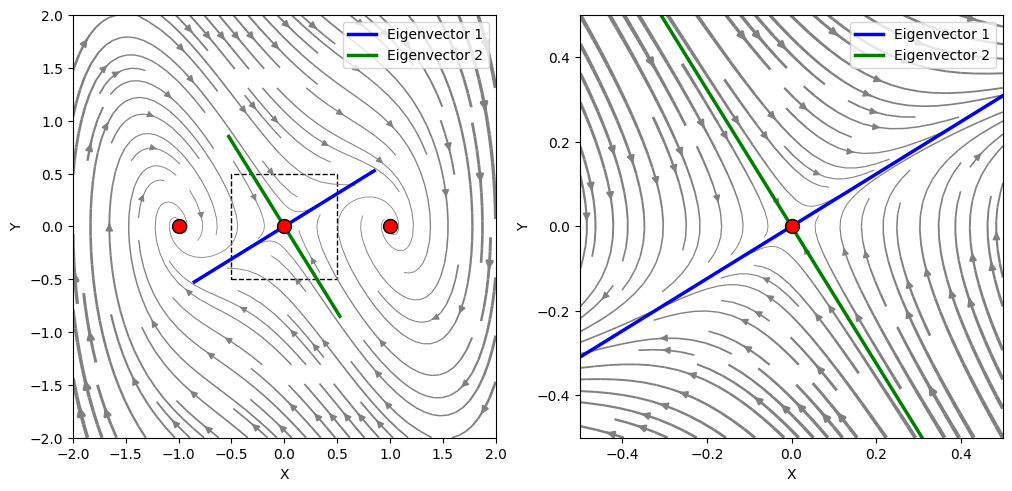

In [12]:

# Call the function
"""
This code creates a figure with two subplots to visualize phase diagrams with eigenvectors.
It performs the following steps:
1. Creates a figure with two subplots arranged in a single row.
2. Sets the size of the figure to 12 inches by 6 inches.
3. Defines a zoom range for the second subplot.
4. Plots the phase diagram with eigenvectors on the first subplot.
5. Plots the phase diagram with eigenvectors on the second subplot with a specified zoom range.
6. Draws a square on the first subplot to indicate the zoomed-in area shown in the second subplot.
7. Displays the figure.
"""
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
zoom_range=0.5
ax[0] = plot_eigenvectors_phase_diagram(ax[0], rhs, equilibrium_points)
ax[1] = plot_eigenvectors_phase_diagram(ax[1], rhs, equilibrium_points,zoom_range=zoom_range)

# Draw a square in ax[0] based on the zoom_range in ax[1]
square_range = zoom_range
square = plt.Rectangle((-square_range, -square_range), 2*square_range, 2*square_range, fill=False, color='black', linestyle='--')
ax[0].add_patch(square)
plt.show()



<span style="color:cadetblue">
What do you notice?

Saddle point at (0,0) and two stable (the trajectories pointing inwards) spirals.
</span>

# Some definitions

## Definition of **flow** (Definition 2 on p 118)
A _flow_ is a mapping $\pi: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ such that:
1. $\pi$ is continuous
2. $\pi(\bf{x},0)=\bf{x} \ \forall \ \bf{x}\in \mathbb{R}^2$
3. $\pi(\pi(\bf{x},t_1),t_2)=\pi(\bf{x},t_1+t_2)$

## Definition of Trajectories or orbits (Definition 3 on p 118)
Suppose $I_{\bf{x}}$ is the maximal interval of existence.
A trajectory through $\bf{x}$ is defined as
$$
\gamma(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}}
$$


- Positive *semi-orbit* is defined: $\gamma^+(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t>0}$
- Negative *semi-orbit* is defined: $\gamma^-(\bf{x} )={\pi(\bf{x},t):t\in I_{\bf{x}}, t<0}$

# Our example
Lets plot some solutions

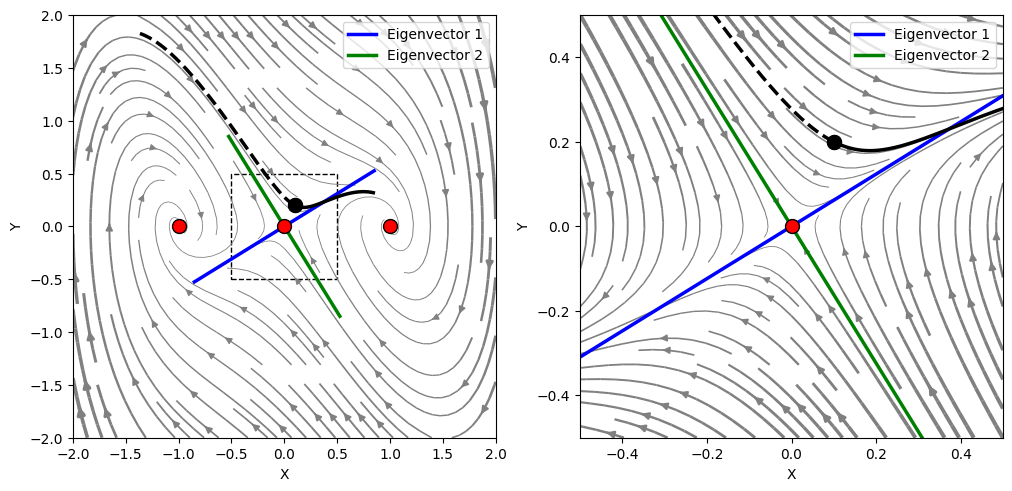

In [13]:
y0=[0.1,0.2]
ax[0]=plot_solution(ax[0],rhs,y0,t_end=3,color='black', linestyle='-')
ax[0]=plot_solution(ax[0],rhs,y0,t_end=-2,color='black', linestyle='--')
ax[1]=plot_solution(ax[1],rhs,y0,t_end=3,color='black', linestyle='-')
ax[1]=plot_solution(ax[1],rhs,y0,t_end=-2,color='black', linestyle='--')
plt.show()
fig

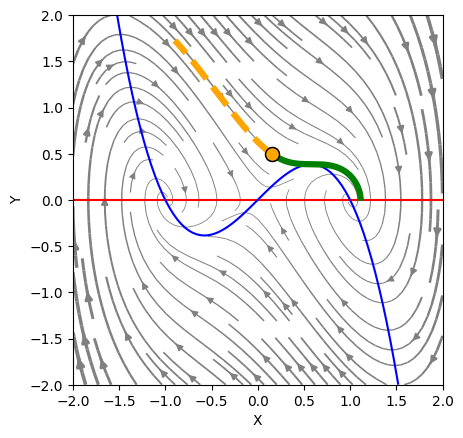

In [18]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax=plot_flow(ax,rhs,nullclines=True)

# Change y0 below to see different solutions.
y0=[0.15,0.5]
ax=plot_solution(ax,rhs,y0,t_end=3,color='green',linewidth=4.5)
ax=plot_solution(ax,rhs,y0,t_end=-1.1,color='orange',linestyle='--', linewidth=4.5)




The orange path is by going backward in time.

## Definition of limit sets (Definition 4 on p 118)
- The positive limit set of a point $\bf{x}$
$$
\Gamma^+ (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$
- The negative limit set of a point $\bf{x}$
$$
\Gamma^- (\bf{x})=\{\bf{y}, \exists \  \{t_n\} \rightarrow - \infty \ s.t. \ \pi(\bf{x},t)\rightarrow \bf{y}\}
$$

In phase plane: critical points (equilibrium points), closed orbits (repeating loop), or infinity (infinitely far way from the origin).

## Invariant sets


**Definition 5.** on p. 118.

A set $S$ is **invariant** with respect to a flow if $\bf{x} \in S$ implies that $\gamma(\bf{x}) \subset S$.

- A set $S$ is **positively invariant** with respect to a flow if $\bf{x} \in S$ implies that $\gamma^+(\bf{x}) \subset S$.  

- A set $S$ is **negatively invariant** with respect to a flow if $\bf{x} \in S$ implies that $\gamma^-(\bf{x}) \subset S$.  

Our example has two stable spirals (positively invariant) and one unstable saddle point (negatively invariant).


## Basins of attractions
Remember that the origin for our example is a saddle point. Let's plot the solutions with initial conditions close to origin along the eigenvectors.

In [19]:
xy = [0, 0]
jac = jacobian(rhs, xy)

eigenvalues, eigenvectors = eigenvalues_eigenvectors(jac)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [ 0.61803399 -1.61803399]
Eigenvectors:
 [[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


(-5.0, 5.0)

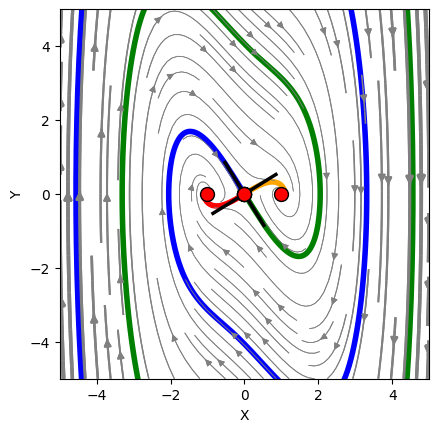

In [21]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
eps=1.e-8
zoom_range=5
xrange=[-zoom_range,zoom_range]
yrange=[-zoom_range,zoom_range]
ax=plot_flow(ax,rhs,xrange=xrange,yrange=yrange,nullclines=False)

y0=[0,0]+eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='orange', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,0]
ax=plot_solution(ax,rhs,y0,t_end=100, color='red', linewidth=4)
y0=[0,0]+eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, color='blue', linewidth=4)
y0=[0,0]-eps*eigenvectors[:,1]
ax=plot_solution(ax,rhs,y0,t_end=-20, linewidth=4)
ax = plot_eigenvectors_phase_diagram(ax, rhs, equilibrium_points, colors=['black', 'black'], legend=False, zoom_range=zoom_range)
ax.set_xlim(xrange[0], xrange[1])
ax.set_ylim(yrange[0], yrange[1])

**Try this:**

<span style="color:cadetblue">
Increase the zoom_range in the cell above, what do you notice?

Do we have any limit sets and invariant sets?
</span>

Let's plot many solutions!

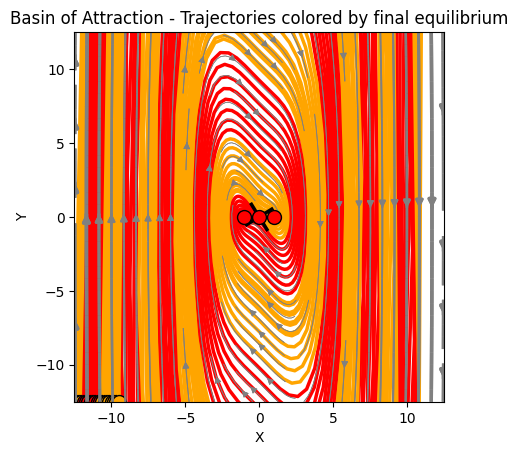

In [22]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
zoom_range=12.5
xrange=[-zoom_range,zoom_range]
yrange=[-zoom_range,zoom_range]
initial_x_values = np.linspace(xrange[0], xrange[0] + 3, 20)
initial_y_value = yrange[0]

for x_val in initial_x_values:
    y0 = [x_val, initial_y_value]
    sol = sc.integrate.solve_ivp(rhs, t_span=[0, 100], y0=y0, t_eval=np.linspace(0, 100, 1000))
    end_point = sol.y[:, -1]

    distance_to_1_0 = np.linalg.norm(end_point - np.array([1, 0]))
    distance_to_neg1_0 = np.linalg.norm(end_point - np.array([-1, 0]))

    if distance_to_1_0 < distance_to_neg1_0:
        color = 'orange'
    else:
        color = 'red'

    ax = plot_solution(ax, rhs, y0, t_end=100, color=color)


ax=plot_flow(ax,rhs,xrange=xrange,yrange=yrange,nullclines=False)
ax = plot_eigenvectors_phase_diagram(ax, rhs, equilibrium_points, colors=['black', 'black'], legend=False, zoom_range=zoom_range)
ax.set_xlim(xrange[0], xrange[1])
ax.set_ylim(yrange[0], yrange[1])
ax.set_aspect('equal')
# Add title to the plot
ax.set_title('Basin of Attraction - Trajectories colored by final equilibrium')
plt.show()
# only stable equilibrium points have basins of attraction.


# Limit cycles


### Holling-Tanner
The **Holling-Tanner model** is a predator-prey system that extends classical Lotka-Volterra dynamics by incorporating more realistic ecological mechanisms. It was developed to better represent population interactions observed in nature.

**Key features:**
- **Prey population (x):** Grows logistically with a carrying capacity, representing limited resources
- **Predator population (y):** Exhibits density-dependent growth that depends on prey availability
- **Holling Type II functional response:** The predation rate saturates as prey density increases, reflecting handling time and predator saturation

The Holling-Tanner model describes predator-prey dynamics with nonlinear interactions. The prey population ($x$) grows logistically, limited by carrying capacity, and is consumed by predators ($y$) at a rate that saturates for large prey populations (a Holling type II functional response). The predator population grows proportionally to its current size and the availability of prey, but is also limited by its own density. This system can exhibit stable equilibria, oscillations, or limit cycles, depending on parameter values, and is widely used to study ecological stability and population cycles.



**Mathematical form:**
The model is typically written as:
$$
\begin{aligned}
\dot{x} &= rx\left(1 - \frac{x}{K}\right) - \frac{axy}{b + b x} \\
\dot{y} &= sy\left(1 - \frac{ c y}{x}\right)
\end{aligned}
$$

where:
- $r$ = prey intrinsic growth rate
- $K$ = prey carrying capacity
- $a$ = maximum predation rate
- $b$ = half-saturation constant
- $s$ = predator growth rate
- $c$ = predator-to-prey conversion efficiency

**Dynamics:**
The Holling-Tanner model can exhibit rich dynamics including:
- Stable equilibria
- Limit cycles (periodic oscillations)
- Bistability between different attractors

This makes it particularly useful for studying ecological stability, population cycles, and the effects of harvesting or conservation strategies.


In [23]:
# Rhs for the Holling-Tanner model
def holling_tanner(t,xy,params=None):
    # here X[0] = x and X[1] = y
    x,y=xy
    if params is not None: # para
        # Unpack parameters if provided
        r,s,a,b,c,K = params
    else:
        r,s,a,b,c,K = 1,0.2,6,7,2.5,7  # default values from Turner et al.

    dx=r*x*(1-x/K)-a*x*y/(b+b*x)
    dy=s*y*(1 - c*y/x)
    return np.array([dx, dy])

The examples in Turner uses


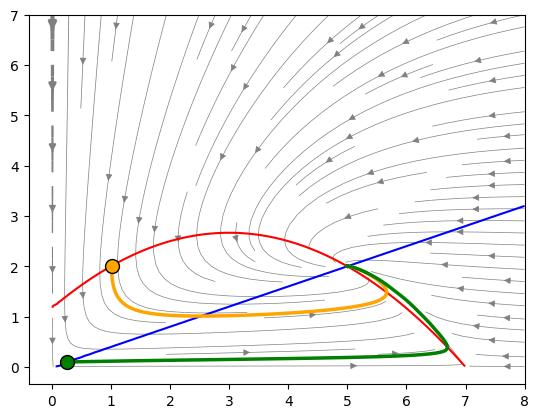

In [30]:


fig, ax = plt.subplots(1, 1)
a=6 # This is given in Turner et al.
#a=0  # Setting a=0, what does that do?
c=2.5
params = [1,0.2,a,7,c,7] # r,s,a,b,c,K
ax = plot_flow(ax, holling_tanner, xrange=[0.01, 8], yrange=[0.01, 7], nullclines=True, params=params)
ax = plot_solution(ax, holling_tanner, [1.01, 2], t_end=200, color='orange', params=params)
ax = plot_solution(ax, holling_tanner, [0.25, 0.1], t_end=200, params=params)

#equilibrium point is an unstable spiral

**Try this:** Set $a=0$ in the cell above. What does this represent?
Sets our predation rate to 0. The prey will grow until it reaches carrying capacity K.

In [31]:
from ipywidgets import interact, FloatSlider


c=2.5
params = [1,0.2,6,7,c,7] # r,s,a,b,c,K
#params = [1,0,0,7,2.5,7] # r,s,a,b,c,K



# Create interactive slider for c parameter

def update_plot(c_val):
    fig, ax = plt.subplots(1, 1)
    params = [1, 0.2, 6, 7, c_val, 7]
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_aspect('equal')
    ax = plot_flow(ax, holling_tanner, xrange=[0.01, 7], yrange=[0.01, 7], nullclines=True, params=params)
    ax = plot_solution(ax, holling_tanner, [1.01, 2], t_end=200, color='orange', params=params)
    ax = plot_solution(ax, holling_tanner, [0.25, 0.1], t_end=200, params=params)
    plt.show()

interact(update_plot, c_val=FloatSlider(min=0.5, max=2.5, step=0.1, value=2.5))
ax.set_ylabel('Y')
ax.set_aspect('equal')



interactive(children=(FloatSlider(value=2.5, description='c_val', max=2.5, min=0.5), Output()), _dom_classes=(…

At c=0.7 we have a stable limit cycle -> the eq point is an unstable spiral.

### Definition *limit cycle* (Definition 6 on p 188)
A limit cycle, $\Gamma$, is
- a stable limit cycle if $\Lambda^+(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are attracted to the limit cycle.
- a unstable limit cycle if $\Lambda^-(\bf{x})=\Gamma \ \forall \ \bf{x} $ in some neighbourhood, all nearby trajectories are repelled from the limit cycle.
- a semi-stable limit cycle if it's attracting on one side and repelling on the other side.

### Definition period of a limit cycle (Definition 7 on p 119)
is given by the minimum $T$ so that $\bf{x}(t+T)=\bf{x}(t)$.

---

See *Example 1* on page 119.



![Skjermbilde 2024-01-22 kl. 06.07.39.png](<attachment:Skjermbilde 2024-01-22 kl. 06.07.39.png>)

# Theorems on the existence of closed orbits
### Poincaré-Bendixson theorem
Suppose that $\gamma^+$ is contained in a bounded region in which there are finitely many critical points. Then $\Gamma^+(\gamma)$ is either:
- a single critical point
- a single closed orbit
- a graphic- critical points joined by heteroclinic orbits.

A heteroclinic orbit connects to separate critical points and takes an infinite time to make the connection.

### Corollary
Let $D$ be a bounded closed set containing no critical points and suppose that $D$ is positively invariant. Then there exists a limit cycle contained in D.

## Example; The pendulum
The **pendulum** is a classic example of a nonlinear dynamical system that exhibits rich behavior in the phase plane.

**Equation of motion:**
The undamped, nonlinear pendulum is described by:
$$
\ddot{\theta} + \frac{g}{L}\sin(\theta) = 0
$$

where:
- $\theta$ = angular displacement from the vertical
- $g$ = gravitational acceleration
- $L$ = length of the pendulum

**Phase plane formulation:**
Converting to a first-order system by defining $x = \theta$ (angle) and $y = \dot{\theta}$ (angular velocity):
$$
\begin{aligned}
\dot{x} &= y \\
\dot{y} &= -\frac{g}{L}\sin(x)
\end{aligned}
$$

**Key features:**
- **Fixed points:** Located at $(n\pi, 0)$ for integer $n$
    - Even multiples of $\pi$: centers (stable equilibria where pendulum hangs down)
    - Odd multiples of $\pi$: saddle points (unstable equilibria where pendulum points up)
- **Energy conservation:** The undamped pendulum conserves energy, leading to closed orbits around the stable equilibria
- **Separatrices:** Trajectories connecting saddle points (heteroclinic orbits) separate different regions of phase space
- **Nonlinearity:** Unlike the linearized (small-angle) approximation $\sin(\theta) \approx \theta$, the full nonlinear system shows the true periodic behavior is not harmonic

**Physical interpretation:**
- Trajectories around centers represent periodic oscillations
- The separatrix represents the boundary between oscillations and full rotations
- Orbits outside the separatrix correspond to the pendulum rotating continuously

In [ ]:
def pendulum(t, xy, params=None):
    """
    Right-hand side function for the pendulum system.

    Parameters
    ----------
    t : float
        Time (not used in autonomous system)
    xy : array-like
        State vector [theta, theta_dot] where theta is angle and theta_dot is angular velocity
    params : list or array-like, optional
        Parameters [g, L] where g is gravitational acceleration and L is pendulum length
        Default is [9.81, 1.0]

    Returns
    -------
    array
        Derivatives [dtheta/dt, dtheta_dot/dt]
    """
    x, y = xy

    if params is not None:
        g, L = params
    else:
        g, L = 9.81, 1.0  # default values: g = 9.81 m/s^2, L = 1.0 m

    dx = y
    dy = -(g/L) * np.sin(x)

    return np.array([dx, dy])

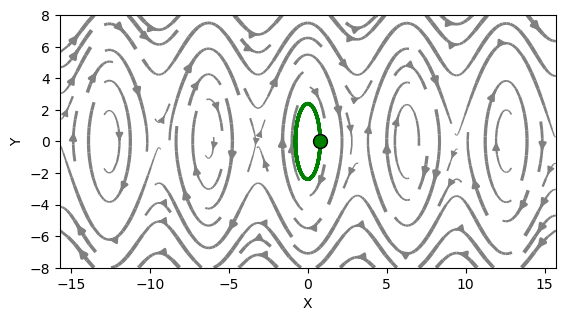

In [ ]:
xlim = 5 * np.pi
ylim = 8
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

ax = plot_flow(ax, pendulum, xrange=[-xlim, xlim], yrange=[-ylim, ylim], nullclines=False)

# Plot some solution trajectories
ax = plot_solution(ax, pendulum, [np.pi/4, 0], t_end=10, color='green')
#ax = plot_solution(ax, pendulum, [np.pi, 0], t_end=10, color='green',linewidth=3)
#ax = plot_solution(ax, pendulum, [-4*np.pi, 6.5], t_end=10, color='orange',linestyle=':', linewidth=3)
#ax = plot_solution(ax, pendulum, [4*np.pi, - 6.5], t_end=10, color='orange',linestyle=':', linewidth=3)

#ax= plot_solution(ax,pendulum,[-np.pi,0],t_end=20, color='black',linestyle='--', linewidth=3)
#ax= plot_solution(ax,pendulum,[np.pi,-0],t_end=20,color='black', linestyle='-.', linewidth=3)
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)
ax.set_aspect('equal')
plt.show()

**Try this:** Uncomment the different lines in cell above. Can you explain the different solutions.

### Example 2 p 121
$$
\begin{array}{rl}
\dot{x}=&y-8x^3 \\
\dot{y}=&2y-4x-2y^3
\end{array}
$$

In [ ]:

def plot_jordan(ax,rhs,r0=[0,0],rr=1,num=25,vectors=True, color='blue',linewidth=1.5,params=None):
    """
    Plots a closed curve (e.g., circle) in the phase plane with velocity vectors at discrete points.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes object to plot on.
    rhs : function
        The right-hand side function of the ODE system. Should accept arguments (t, xy, params).
    r0 : array-like, optional
        Center of the curve as [x0, y0]. Default is [0, 0].
    rr : float, optional
        Radius of the circle. Default is 1.
    num : int, optional
        Number of points to sample on the circle. Default is 25.
    vectors : bool, optional
        If True, plot velocity vectors at each point on the circle. Default is True.
    color : str, optional
        Color of the circle and vectors. Default is 'blue'.
    linewidth : float, optional
        Width of the plotted circle. Default is 1.5.
    params : list or array-like, optional
        Parameters to pass to the rhs function. Default is None.

    Returns
    -------
    ax : matplotlib.axes.Axes
        The axes object with the circle and vectors plotted.
    """
    theta=np.linspace(0,2*np.pi, num)
    x=rr*np.cos(theta)+r0[0]
    y=rr*np.sin(theta)+r0[1]
    ax.plot(x,y,linewidth=linewidth, color=color)
    if vectors:
        U,V=rhs(0,[x,y],params=params)
        ax.quiver(x,y,U,V)

    return ax




(-1.5, 1.5)

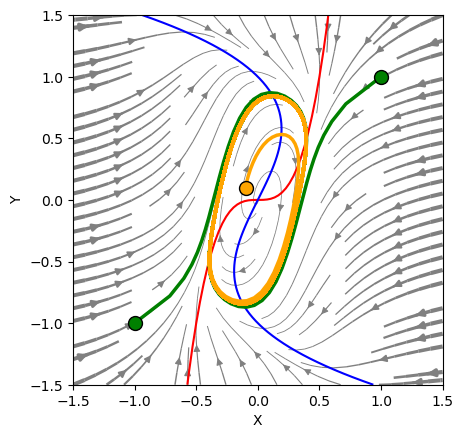

In [ ]:
### Example
def ex2p121(t,xy,params=None):
    x,y=xy
    dx=y-8*x**3
    dy=2*y-4*x-2*y**3
    return np.array([dx,dy])

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

xymax=1.5

ax=plot_flow(ax,ex2p121,xrange=[-xymax,xymax],yrange=[-xymax,xymax],nullclines=True)
y0=[1,1]
ax=plot_solution(ax,ex2p121,y0,t_end=150)
y0=[-1,-1]
ax=plot_solution(ax,ex2p121,y0,t_end=150)
y0=[-0.1,0.1]
ax=plot_solution(ax,ex2p121,y0,t_end=150,color='orange')

#ax=plot_jordan(ax,ex2p121,r0=[0,0],rr=.2,num=30,vectors=True,color='black',linewidth=2.5)

#ax=plot_jordan(ax,ex2p121,r0=[0,0],rr=1.5,num=30,vectors=True,color='black',linewidth=2.5)
ax.set_xlim(-xymax, xymax)
ax.set_ylim(-xymax, xymax)

**Try this:** Uncomment the calls to the Jordan curves in the cell above. What do you see?

### Dulacs Criterion
Consider an annular region, $A$ contained in an open set $E$. If
$$
\nabla \cdot (\psi \bf{X})
$$
does not change sign in $A$, where $\psi$ is continuously differentiable, then there is at most one limit cycle entirely contained in A.

---

Do examples 3 and 4 on pages 122-123.

### Example 3  on p. 122.

$$
\begin{aligned}
\dot{x} &= -y + x\left(1 - 2x^{2} - 3y^{2}\right), \\
\dot{y} &= \;\;x + y\left(1 - 2x^{2} - 3y^{2}\right).
\end{aligned}
$$

Looking at this example, I need to provide a markdown explanation for Example 3 from page 122 of the textbook.

#### Using Dulac's Criterion

We apply Dulac's criterion with $\psi(x,y) = 1$ (the simplest choice).

For the system:
$$
\mathbf{X} = \begin{pmatrix} -y + x(1 - 2x^2 - 3y^2) \\ x + y(1 - 2x^2 - 3y^2) \end{pmatrix}
$$

We compute the divergence:
$$
\nabla \cdot \mathbf{X} = \frac{\partial}{\partial x}[-y + x(1 - 2x^2 - 3y^2)] + \frac{\partial}{\partial y}[x + y(1 - 2x^2 - 3y^2)]
$$

$$
= (1 - 2x^2 - 3y^2) - 4x^2 + (1 - 2x^2 - 3y^2) - 6y^2
$$

$$
= 2(1 - 2x^2 - 3y^2) - 4x^2 - 6y^2 = 2 - 8x^2 - 12y^2
$$

This is negative when $8x^2 + 12y^2 > 2$, i.e., outside the ellipse $4x^2 + 6y^2 = 1$.

Therefore, by Dulac's criterion, there is at most one limit cycle in any annular region where this divergence doesn't change sign. Since the origin is a source (as can be verified by linearization), and the divergence is negative in an outer annular region, there is exactly one stable limit cycle.

/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_84083/3531422058.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, 'b', linewidth=5, color='black')


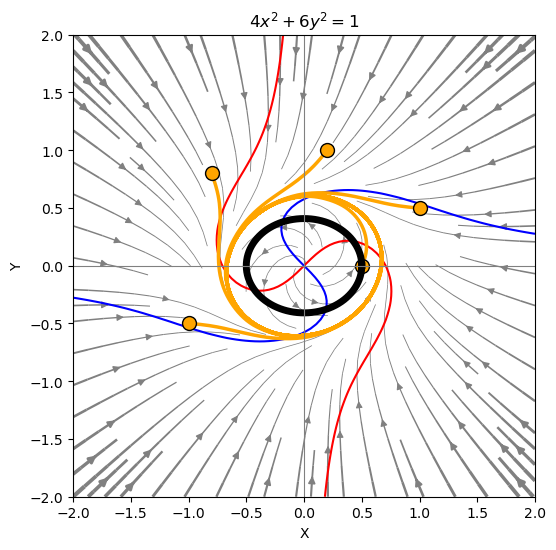

In [ ]:
def example3_rhs(t, xy, params=None):
    x, y = xy
    dx = -y + x * (1 - 2 * x**2 - 3 * y**2)
    dy = x + y * (1 - 2 * x**2 - 3 * y**2)
    return np.array([dx, dy])

# Phase portrait for Example 3 (p.122)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect("equal")

xmax = 2.0
ax = plot_flow(ax, example3_rhs, xrange=[-xmax, xmax], yrange=[-xmax, xmax], nullclines=True)

# A few sample trajectories
initial_conditions = [[0.5, 0.0], [1.0, 0.5], [-1.0, -0.5], [0.2, 1.0], [-0.8, 0.8]]
for y0 in initial_conditions:
    ax = plot_solution(ax, example3_rhs, y0, t_end=50, color='orange')



# Ellipsens parametre
a = 1/2              # semi-akse i x-retning
b = 1/np.sqrt(6)     # semi-akse i y-retning

t = np.linspace(0, 2*np.pi, 400)

x = a * np.cos(t)
y = b * np.sin(t)


ax.plot(x, y, 'b', linewidth=5, color='black')
ax.axhline(0, color='grey', linewidth=0.8)
ax.axvline(0, color='grey', linewidth=0.8)
ax.set_title(r"$4x^2 + 6y^2 = 1$")


plt.show()


### Bendixson criterion, Non existence of limit cycles in the plane
See Theorem on P123.

**Bendixson's Criterion** (Theorem on p. 123)

Consider a system of differential equations:
$$
\begin{aligned}
\dot{x} &= P(x,y) \\
\dot{y} &= Q(x,y)
\end{aligned}
$$

Let $D$ be a simply connected domain (a region with no holes). If there exists a continuously differentiable function $\psi(x,y)$ such that:

$$
\nabla \cdot (\psi \mathbf{X}) = \frac{\partial}{\partial x}(\psi P) + \frac{\partial}{\partial y}(\psi Q)
$$

is **not identically zero** and **does not change sign** in $D$, then there are **no closed orbits** (limit cycles) entirely contained in $D$.

**Special case:** When $\psi(x,y) = 1$, this reduces to:
$$
\nabla \cdot \mathbf{X} = \frac{\partial P}{\partial x} + \frac{\partial Q}{\partial y}
$$

**Interpretation:**
- If the divergence $\nabla \cdot \mathbf{X}$ (or $\nabla \cdot (\psi \mathbf{X})$) is always positive or always negative in a region $D$, then no closed orbits can exist in that region.
- Positive divergence indicates trajectories are diverging (sources), while negative divergence indicates convergence (sinks).
- Closed orbits require the flow to neither consistently expand nor consistently contract.

This criterion is useful for **ruling out** the existence of limit cycles in certain regions of the phase plane.
